In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Load the dataset
data = pd.read_csv("data/shopping_behavior.csv")

In [80]:
# Print the first 5 rows of the dataset
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Demographic Characteristics

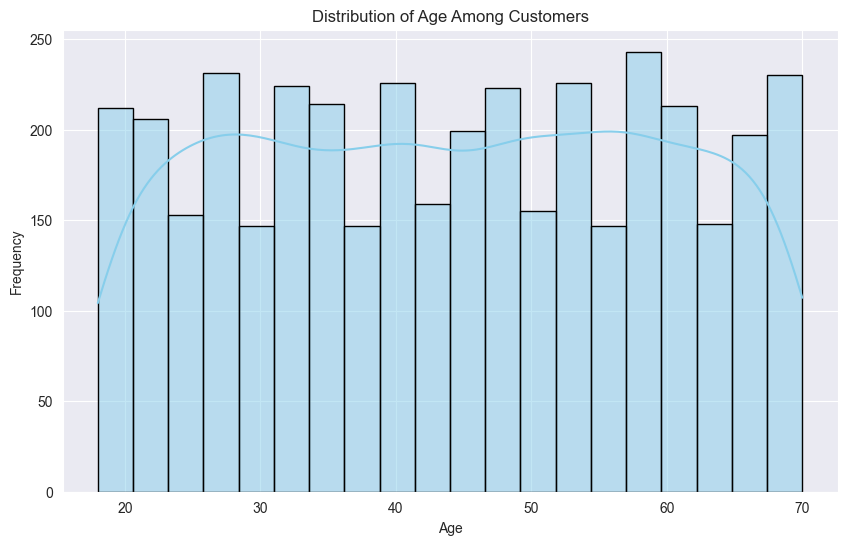

In [81]:
# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Age Among Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

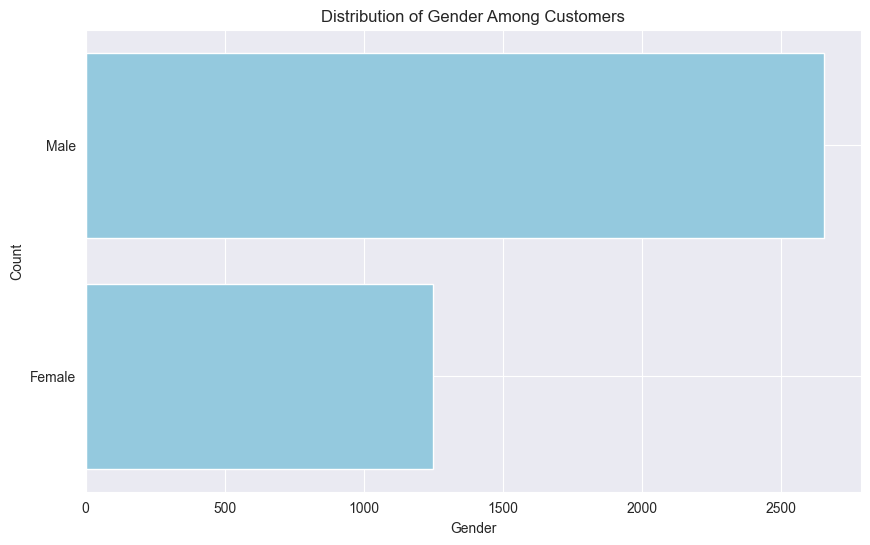

In [82]:
# Plot the distribution of gender
plt.figure(figsize=(10, 6))
sns.countplot(data['Gender'], color='skyblue')
plt.title('Distribution of Gender Among Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

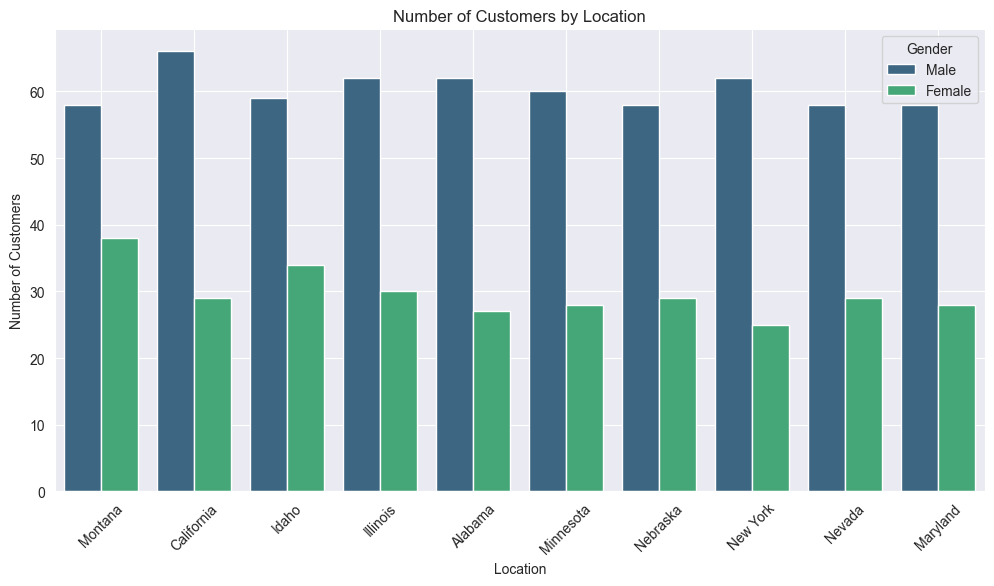

In [83]:
# Plot the count of customers for top 10 location
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=data, order=data['Location'].value_counts().iloc[:10].index, palette='viridis', hue='Gender')
plt.title('Number of Customers by Location')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Popular Product Categories

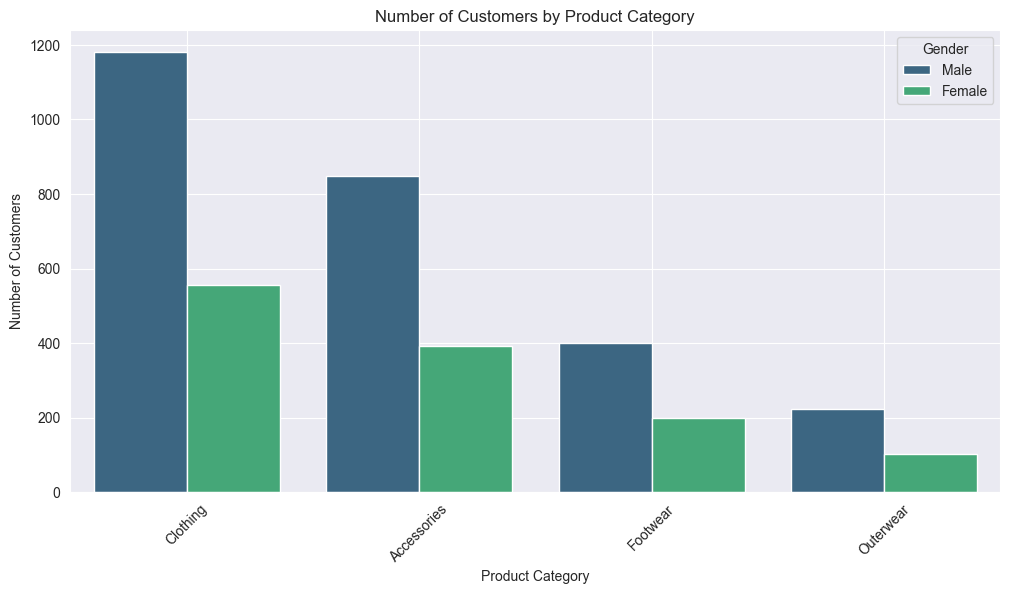

In [84]:
# Plot the count of customers for top 10 product categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=data, order=data['Category'].value_counts().iloc[:10].index, palette='viridis', hue='Gender')
plt.title('Number of Customers by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

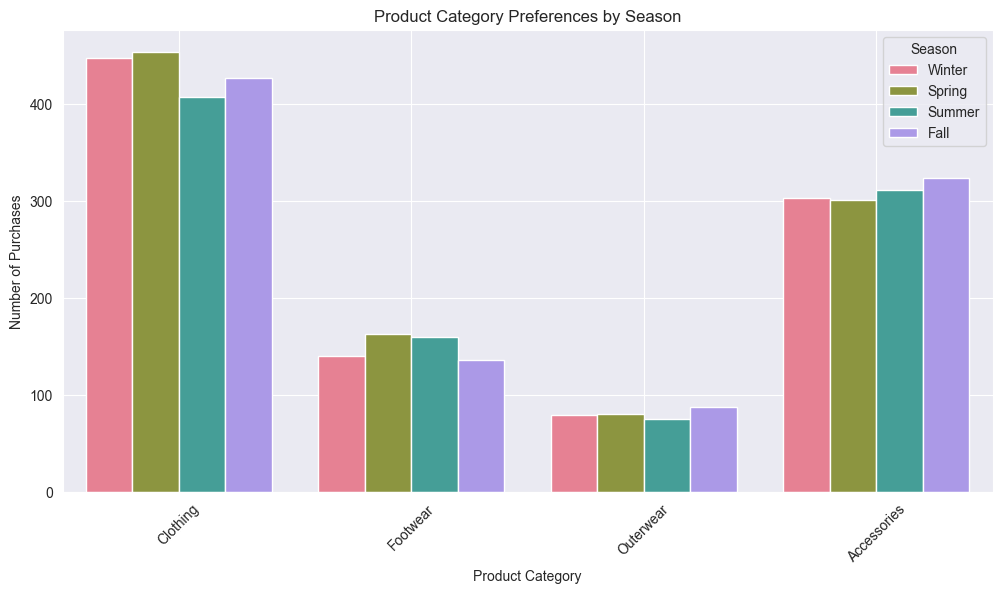

In [86]:
# Plot the count of purchases for each product category by season
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Season', data=data, palette='husl')
plt.title('Product Category Preferences by Season')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.grid(True)
plt.show()

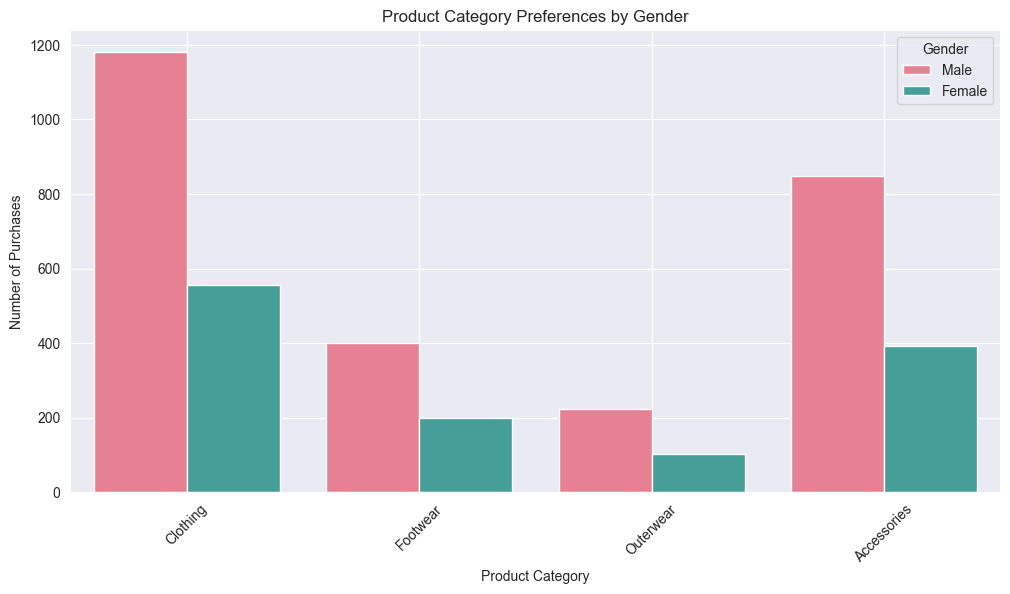

In [87]:
# Plot the count of purchases for each product category by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Gender', data=data, palette='husl')
plt.title('Product Category Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

## Average Purchase Amounts

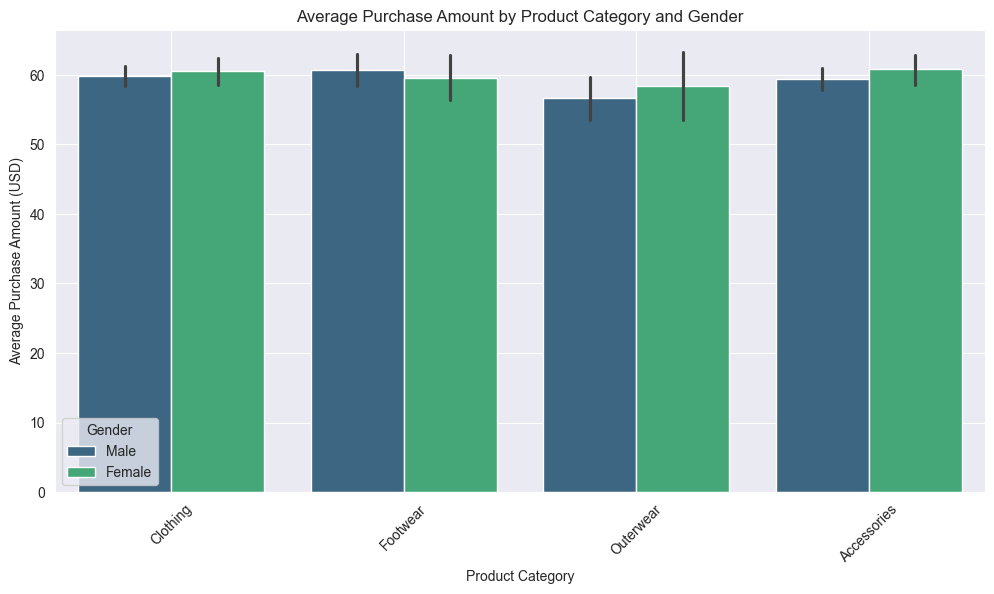

In [88]:
# Plot the average purchase amount for each product category by gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Gender', data=data, palette='viridis')
plt.title('Average Purchase Amount by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

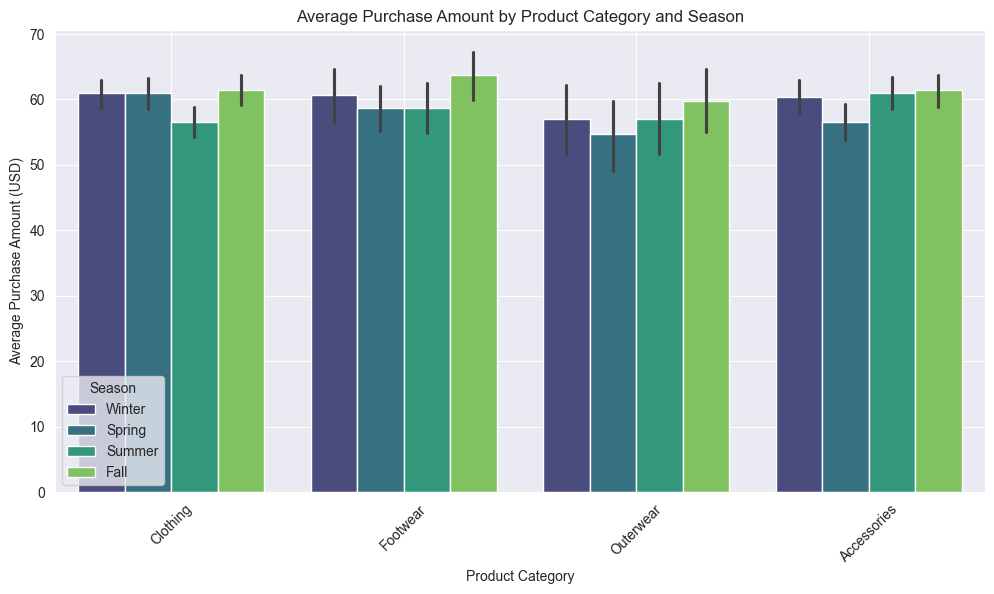

In [89]:
# Plot the average purchase amount for each product category by season
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Season', data=data, palette='viridis')
plt.title('Average Purchase Amount by Product Category and Season')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.grid(True)
plt.show()

In [90]:
# Calculate the average purchase amount per transaction
average_purchase_amount = data['Purchase Amount (USD)'].mean()

print("Average Purchase Amount per Transaction: ${:.2f}".format(average_purchase_amount))

Average Purchase Amount per Transaction: $59.76


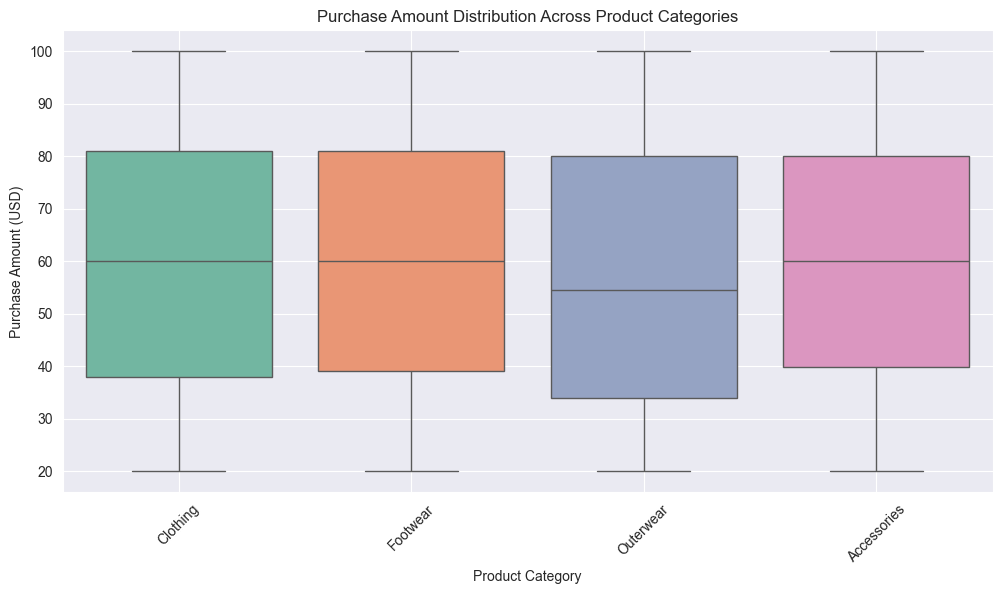

In [91]:
# Create a boxplot to visualize the distribution of purchase amounts for each product category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=data, palette='Set2', hue='Category', legend=False)
plt.title('Purchase Amount Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [92]:
# Calculate the interquartile range (IQR) for purchase amounts
Q1 = data['Purchase Amount (USD)'].quantile(0.25)
Q3 = data['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Purchase Amount (USD)'] < lower_bound) | (data['Purchase Amount (USD)'] > upper_bound)]

if outliers.empty:
    print("There are no outliers in purchase amounts.")
else:
    print("Outliers in purchase amounts:")
    print(outliers)

There are no outliers in purchase amounts.


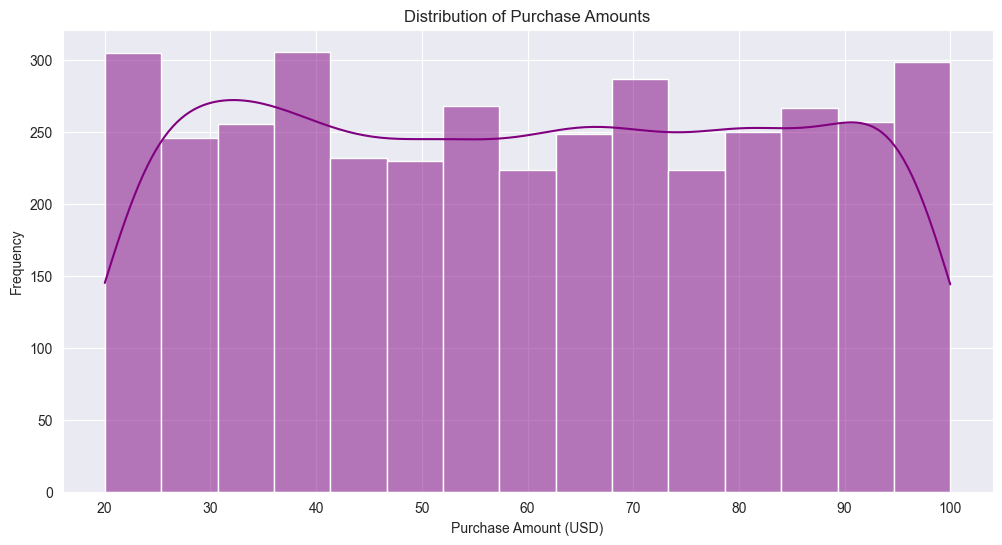

In [93]:
# Plot the histogram of purchase amounts
plt.figure(figsize=(12, 6))
sns.histplot(data['Purchase Amount (USD)'], kde=True, color='purple')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

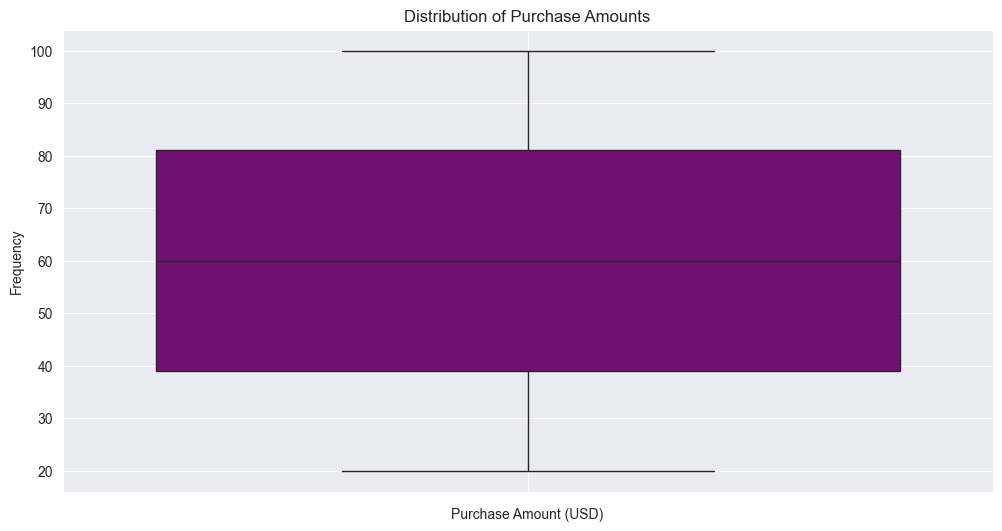

In [94]:
# Plot the boxplot of purchase amounts
plt.figure(figsize=(12, 6))
sns.boxplot(data['Purchase Amount (USD)'], color='purple')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Preferred Payment Methods

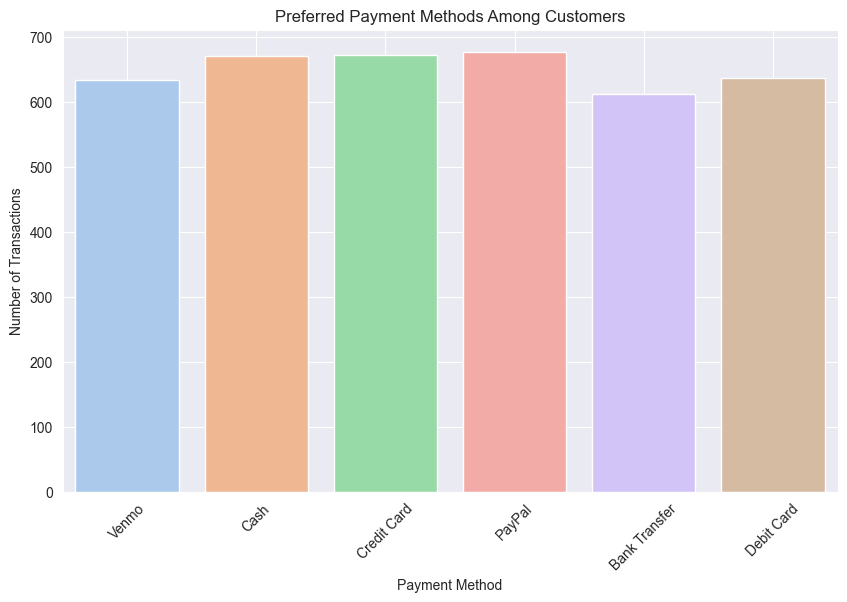

In [95]:
# Plot the count of transactions for each payment method
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=data, palette='pastel', hue='Payment Method')
plt.title('Preferred Payment Methods Among Customers')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

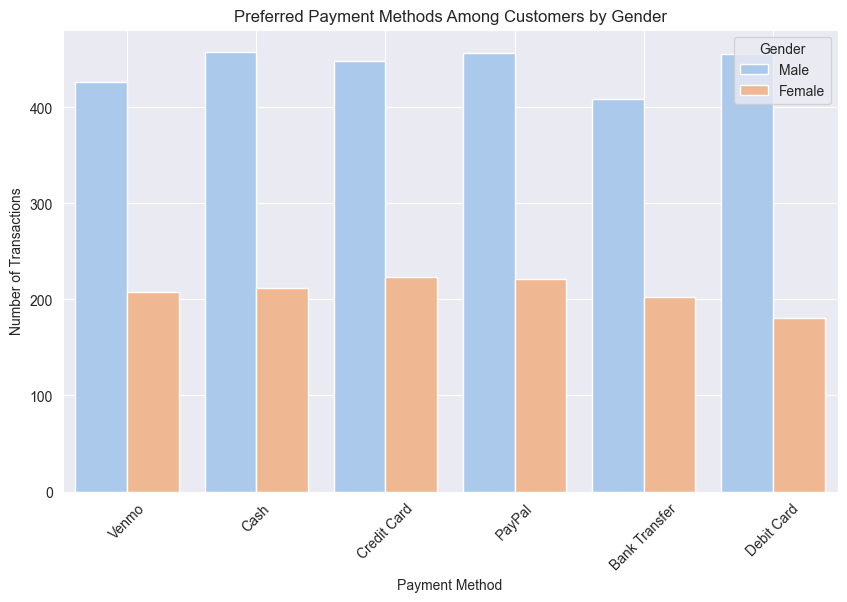

In [96]:
# Plot the count of transactions for each payment method by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', hue='Gender', data=data, palette='pastel', hue_order=['Male', 'Female'])
plt.title('Preferred Payment Methods Among Customers by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

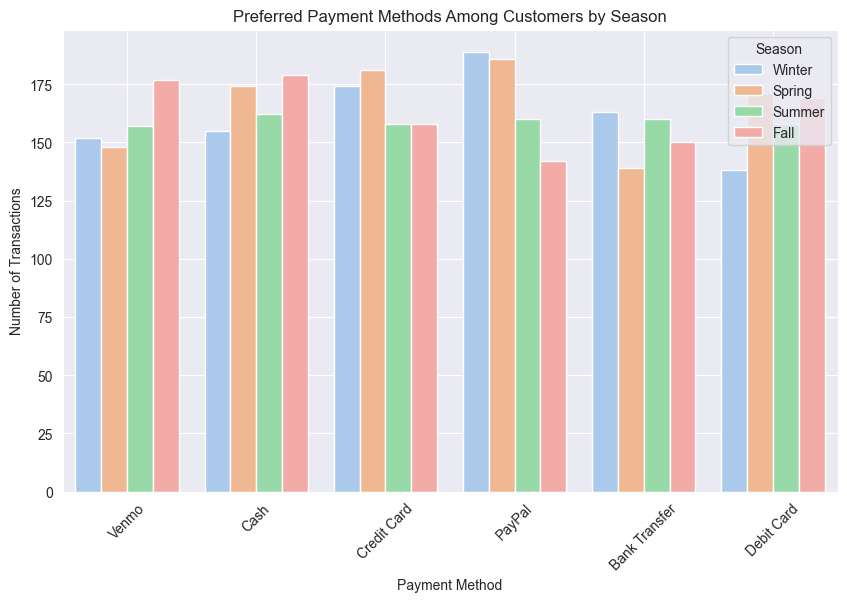

In [98]:
# Plot the count of transactions for each payment method by season
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', hue='Season', data=data, palette='pastel', hue_order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Preferred Payment Methods Among Customers by Season')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.grid(True)
plt.show()

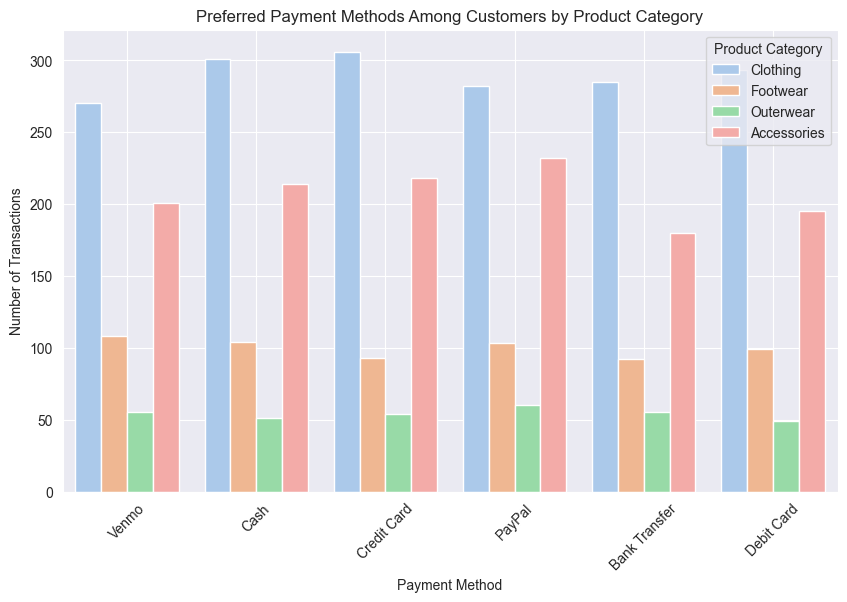

In [99]:
# Plot the count of transactions for each payment method by category
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', hue='Category', data=data, palette='pastel')
plt.title('Preferred Payment Methods Among Customers by Product Category')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.grid(True)
plt.show()

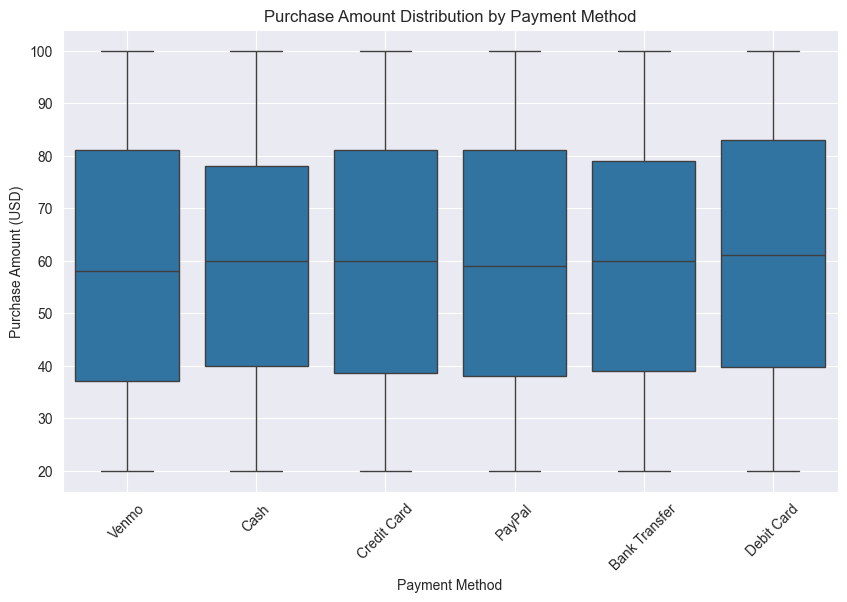

In [109]:
# Create a boxplot or violin plot to visualize the distribution of purchase amounts for each payment method
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Customer Engagement Metrics

In [111]:
# Calculate the average review rating provided by customers
average_review_rating = data['Review Rating'].mean()

print("Average Review Rating provided by customers:", average_review_rating)

Average Review Rating provided by customers: 3.7499487179487176


In [113]:
# Convert 'Frequency of Purchases' to string type and clean the data
data['Frequency of Purchases'] = data['Frequency of Purchases'].astype(str).str.lower().str.strip()

# Check unique values in 'Frequency of Purchases' column
print("Unique values in 'Frequency of Purchases' column:")
print(data['Frequency of Purchases'].unique())

# Count the frequency of each unique value
frequency_counts = data['Frequency of Purchases'].value_counts()

print("\nFrequency of Purchases:")
print(frequency_counts)

Unique values in 'Frequency of Purchases' column:
['fortnightly' 'weekly' 'annually' 'quarterly' 'bi-weekly' 'monthly'
 'every 3 months']

Frequency of Purchases:
Frequency of Purchases
every 3 months    584
annually          572
quarterly         563
monthly           553
bi-weekly         547
fortnightly       542
weekly            539
Name: count, dtype: int64


In [114]:
# Calculate the proportion of customers who opt for subscription services
subscription_proportion = data['Subscription Status'].value_counts(normalize=True).get('Yes', 0)

print("Proportion of customers who opt for subscription services:", subscription_proportion)

Proportion of customers who opt for subscription services: 0.27


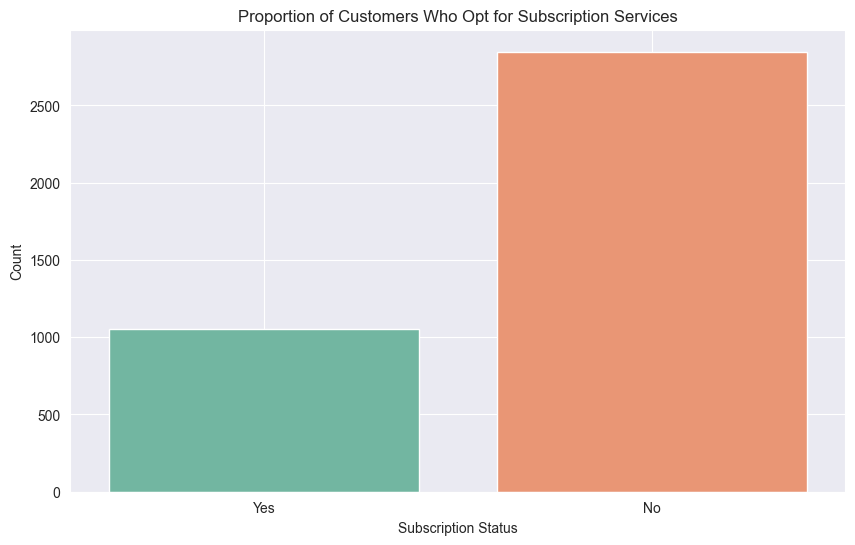

In [120]:
# Plot the proportion of customers who opt for subscription services
plt.figure(figsize=(10, 6))
sns.countplot(x='Subscription Status', data=data, palette='Set2', hue='Subscription Status')
plt.title('Proportion of Customers Who Opt for Subscription Services')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Promotional Activities

In [122]:
# Calculate the frequency of promotional discounts applied to purchases
discount_frequency = data['Discount Applied'].value_counts(normalize=True).get('Yes', 0)

print("Frequency of promotional discounts applied to purchases:", discount_frequency)

Frequency of promotional discounts applied to purchases: 0.43


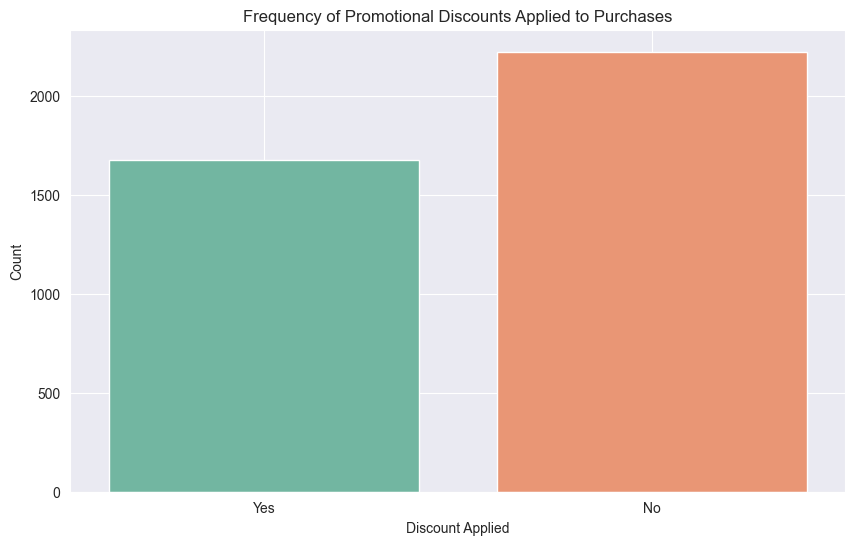

In [123]:
# Plot the frequency of promotional discounts applied to purchases
plt.figure(figsize=(10, 6))
sns.countplot(x='Discount Applied', data=data, palette='Set2', hue='Discount Applied')
plt.title('Frequency of Promotional Discounts Applied to Purchases')
plt.xlabel('Discount Applied')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [126]:
# Count the frequency of promo codes used
promo_code_usage = data['Promo Code Used'].value_counts()

print("Patterns in the use of promo codes:")
print(promo_code_usage)

Patterns in the use of promo codes:
Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64


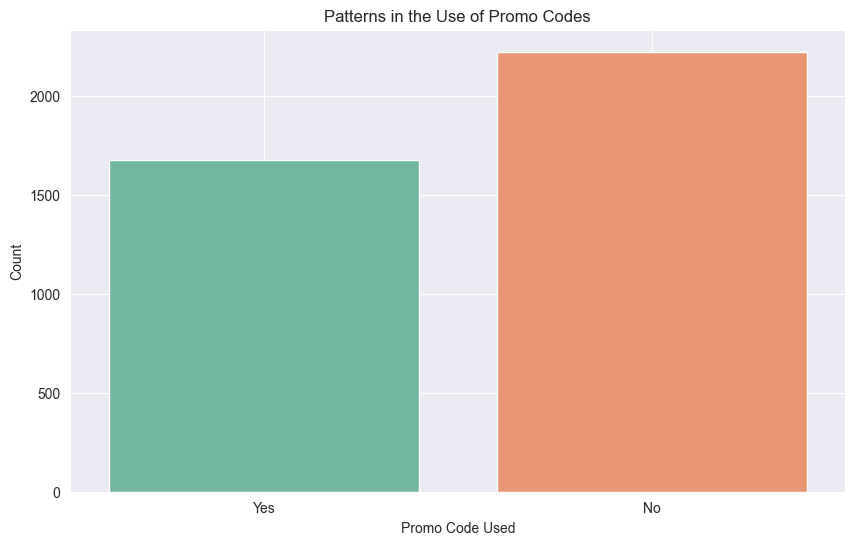

In [127]:
# Plot the patterns in the use of promo codes
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo Code Used', data=data, palette='Set2', hue='Promo Code Used')
plt.title('Patterns in the Use of Promo Codes')
plt.xlabel('Promo Code Used')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [128]:
# Calculate the average purchase amount for transactions with and without promotional discounts
avg_purchase_with_discount = data[data['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_without_discount = data[data['Discount Applied'] == 'No']['Purchase Amount (USD)'].mean()

print("Average purchase amount for transactions with promotional discounts: ${:.2f}".format(avg_purchase_with_discount))
print("Average purchase amount for transactions without promotional discounts: ${:.2f}".format(avg_purchase_without_discount))

Average purchase amount for transactions with promotional discounts: $59.28
Average purchase amount for transactions without promotional discounts: $60.13
